# 数値解析第１２回課題

### 学籍番号：08B22182　氏名：平山聖輝

課題12 <br>
ポアソン方程式

$$
\frac{\partial^2{T}}{\partial{x}^2} + \frac{\partial^2{T}}{\partial{y}^2} = f(x,y)
$$

を， $ x $ ， $ y $ 方向ともに $ \Delta x = \Delta y = 1 $ で３分割したときの
* $ T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2} $ が満たす方程式を求めよ．
* $ T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2} $ を求めよ． <br>
ただし， $ f(x,y) $ は

$$
\begin{equation}
f(x,y) =
\begin{cases}
    -600 \quad (x=1,y=2) \\
    0 \qquad (その他)
\end{cases}
\end{equation}
$$

とする．ただし境界条件は以下．

$$
\eta_1 = 0, \quad \eta_2 = 0, \quad \eta_4 = 100, \quad \eta_5 = 200, \quad \eta_6 = 200 
$$
$$ 
\eta_7 = 100, \quad \eta_8 = 0, \quad \eta_9 = 0, \quad \eta_{10} = 0, \quad \eta_{11} = 0, \quad \eta_{12} = 0
$$

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from PIL import Image
import time

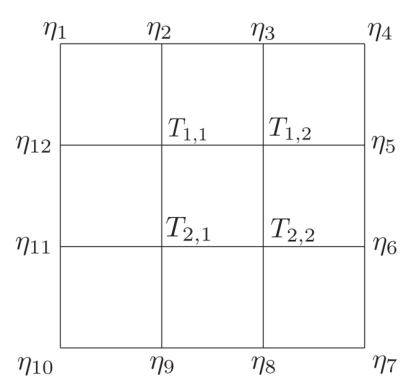

In [6]:
filename = 'image.png'
img = Image.open(filename)
plt.figure(figsize = (5,5))
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

### $ T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2} $ が満たす方程式を求める

講義で確認したように二階の偏微分方程式はテイラー展開を二次まで近似し，もとの偏微分方程式に代入することで行列の線形方程式に帰着させ解くことができる． $x$ ， $y$ 周りのテイラー展開について微小差をそれぞれ $ ±\Delta x $ ， $ ±\Delta y $ とし，二次近似すると

$$
\begin{align}
T(x+\Delta x, y) &= T(x,y) + \Delta x T_x(x,y) + \frac{\Delta x^2}{2}T_{xx}(x,y) \\
T(x-\Delta x, y) &= T(x,y) - \Delta x T_x(x,y) + \frac{\Delta x^2}{2}T_{xx}(x,y) \\
T(x, y+\Delta y) &= T(x,y) + \Delta y T_y(x,y) + \frac{\Delta y^2}{2}T_{yy}(x,y) \\
T(x, y-\Delta y) &= T(x,y) - \Delta y T_y(x,y) + \frac{\Delta y^2}{2}T_{yy}(x,y) \\
\end{align}
$$

となる．上から2式を足したものと，下から2式足したものから求めた $ T_{xx} $ と $ T_{yy} $ をもとの偏微分方程式に代入すると

$$
T(x,y) = pT(x-\Delta x, y) + pT(x+\Delta x, y) + qT(x, y - \Delta y) + qT(x, y + \Delta y) - rf(x,y)
$$

が成り立つ．ただし $ p,q,r $ はそれぞれ

$$
\begin{align}
p &= \frac{1}{2(\Delta x)^2}\biggl(\frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2}\biggr)^{-1} \\
q &= \frac{1}{2(\Delta y)^2}\biggl(\frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2}\biggr)^{-1} \\
r &= \frac{1}{2}\biggl(\frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2}\biggr)^{-1}
\end{align}
$$

である．この等式が各点 $ T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2} $ について成り立つからそれぞれ式に書き起こすと

$$
\begin{align}
T_{1,1} &= p\eta_{12} + pT_{1,2} + q\eta_2 + qT_{2,1} \\
T_{1,2} &= pT_{1,1} + p\eta_5 + q\eta_3 + qT_{2,2} \\
T_{2,1} &= p\eta_{11} + pT_{2,2} + qT_{1,1} + q\eta_9 + 600r \\
T_{2,2} &= pT_{2,1} + p\eta_6 + qT_{1,2} + q\eta_8
\end{align}
$$

これをベクトル表記にすると

$$
\left[\begin{array}{cccc}
1 & -p & -q & 0 \\
-p & 1 & 0 & -q \\
-q & 0 & 1 & -p \\
0 & -q & -p & 1
\end{array}\right]
\left[\begin{array}{c}
T_{1,1} \\
T_{1,2} \\
T_{2,1} \\
T_{2,2}
\end{array}\right] =
\left[\begin{array}{c}
p\eta_{12} + q\eta_2 \\
p\eta_5 + q\eta_3 \\
p\eta_{11} + q\eta_9 + 600r \\
p\eta_6 + q\eta_8
\end{array}\right]
$$

となり，各点の温度 $T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2}$ が満たす方程式を求めることができた．

### $T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2}$ を求める

In [8]:
dx = 1
dy = 1
p = 1/(2*dx**2)/(1/dx**2 + 1/dy**2)
q = 1/(2*dy**2)/(1/dx**2 + 1/dy**2)
r = 1/2/(1/dx**2 + 1/dy**2)
print('p =', p, '\n')
print('q =', q, '\n')
print('r =', r)

p = 0.25 

q = 0.25 

r = 0.25


In [10]:
def eta(x,y):
    if x == 3 and (y == 0 or y == 3):
        return 100
    if x == 3 and (y == 1 or y == 2):
        return 200
    else:
        return 0

In [12]:
eta1 = eta(0,0)
eta2 = eta(1,0)
eta3 = eta(2,0)
eta4 = eta(3,0)
eta5 = eta(3,1) 
eta6 = eta(3,2)
eta7 = eta(3,3)
eta8 = eta(2,3)
eta9 = eta(1,3)
eta10 = eta(0,3)
eta11 = eta(0,2)
eta12 = eta(0,1)
#Eta = [eta1, eta2, eta3, eta4, eta5, eta6, eta7, eta8, eta9, eta10, eta11, eta12]

In [14]:
A = np.array([[1 , -p, -q, 0],[-p, 1, 0, -q],[-q, 0, 1, -p],[0, -q, -p, 1]])
B = np.array([[p*eta12 + q*eta2],[p*eta5 + q*eta3],[p*eta11 + q*eta9 + 600*r],[p*eta6 + q*eta8]])

In [16]:
T = np.linalg.solve(A,B)
display(T)

array([[ 75.],
       [100.],
       [200.],
       [125.]])

したがって求めたい $T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2}$ は以下

$$
\begin{align}
T_{1,1} &= 75 \\
T_{1,2} &= 100 \\
T_{2,1} &= 200 \\
T_{2,2} &= 125
\end{align}
$$

### 反復法を用いて温度分布を表示させる

反復法を用いて温度分布を表示させることを考える．そのときの更新則は以下．

$$
T_{i,j}^{(n+1)} = pT_{i-1, j}^{(n+1)} + pT_{i+1,j}^{(n)} + qT_{i,j-1}^{(n+1)} + qT_{i,j-1}^{(n+1)} - rf_{i,j}
$$

In [22]:
N = 3
ans0 = np.zeros((N+1, N+1))

In [24]:
ans0[0,N] = 100
ans0[1,N] = 200
ans0[2,N] = 200
ans0[3,N] = 100
display(ans0)

array([[  0.,   0.,   0., 100.],
       [  0.,   0.,   0., 200.],
       [  0.,   0.,   0., 200.],
       [  0.,   0.,   0., 100.]])

初期状態をmatplotlib.pyplotにて表示してみる．

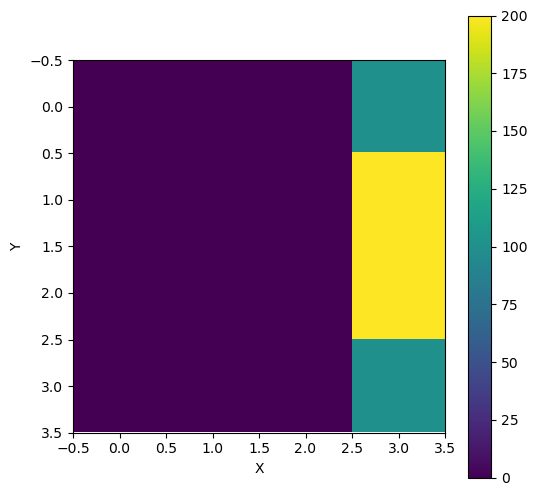

In [26]:
fig = plt.figure(figsize=(6,6))
plt.imshow(ans0)
plt.colorbar() 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

関数 $f(x,y)$ も定義しておく必要があるので用意する．

In [64]:
#配列の要素が(y,x)となっていることに注意して作る
def f(y,x):
    if x == 1 and y == 2:
        return -600
    else:
        return 0

In [50]:
def calcPoason(ans0, e, count_max):
    count = 0
    ans = ans0.copy()
    t1 = time.time()
    
    for n in range(count_max):
        #flatten関数は多次元の配列を一次元に平坦化．これのノルムで収束判定
        v_ans = ans.flatten()
        
        for i in range(1,N):
            for j in range(1,N):
                ans[j,i] = p*ans[j,i-1] + p*ans[j,i+1] + q*ans[j-1,i] + q*ans[j+1,i] - r*f(j,i)

        count = count + 1
        if np.abs(np.linalg.norm(ans.flatten() - v_ans) / np.linalg.norm(ans.flatten())) < e:
            break
    
    t2 = time.time()
    elasped_time = t2 - t1
    display(ans)
    print('計算回数 = ',count)
    print('経過時間 = ',elasped_time, 'sec', elasped_time / 60, 'min')
    return ans

In [56]:
ans = calcPoason(ans0, 10e-10, 20000)

array([[  0.        ,   0.        ,   0.        , 100.        ],
       [  0.        ,  74.99999991,  99.99999995, 200.        ],
       [  0.        , 199.99999995, 124.99999998, 200.        ],
       [  0.        ,   0.        ,   0.        , 100.        ]])

計算回数 =  16
経過時間 =  0.008016109466552734 sec 0.00013360182444254557 min


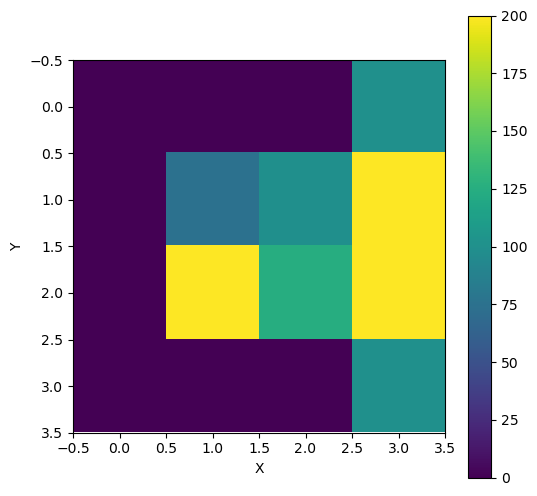

In [58]:
fig = plt.figure(figsize=(6,6))
plt.imshow(ans)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

連立方程式を解いた時と同じ解が得られることが分かる．

### 分割数を上げて反復法で計算する

分割数を3から150に上げて計算してみる．その時の境界条件は　$(x,y)=(150,51)～(150,100)$ で $200$ ，$(x,y)=(150,0)～(150,50),(150,101)～(150,150)$ で $100$ とし，$f(x,y)$ は $x=25～75, y=75～125$ で $-600$ をとるものとする．

In [77]:
N_r = 150
ans0_r = np.zeros((N_r+1,N_r+1))

In [79]:
for i in range(0,51):
    ans0_r[i,N_r] = 100
for j in range(51,101):
    ans0_r[j,N_r] = 200
for k in range(101,N_r+1):
    ans0_r[k,N_r] = 100
display(ans0_r)

array([[  0.,   0.,   0., ...,   0.,   0., 100.],
       [  0.,   0.,   0., ...,   0.,   0., 100.],
       [  0.,   0.,   0., ...,   0.,   0., 100.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 100.],
       [  0.,   0.,   0., ...,   0.,   0., 100.],
       [  0.,   0.,   0., ...,   0.,   0., 100.]])

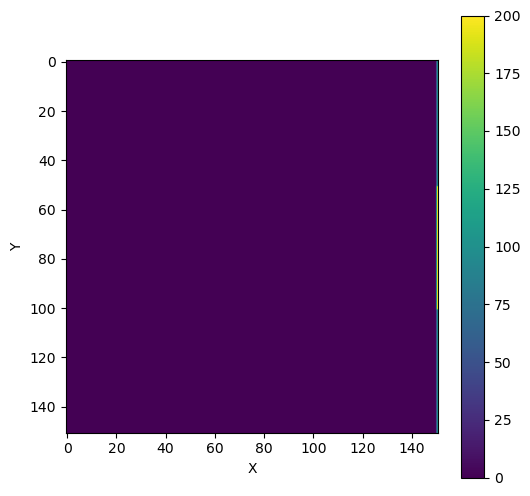

In [81]:
fig = plt.figure(figsize=(6,6))
plt.imshow(ans0_r)
plt.colorbar() 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [83]:
def f_r(y,x):
    if x in range(25,76) and y in range(75,125):
        return -600
    else:
        return 0

In [85]:
def calcPoason_r(ans0, e, count_max):
    count = 0
    ans = ans0.copy()
    t1 = time.time()
    
    for n in range(count_max):
        #flatten関数は多次元の配列を一次元に平坦化．これのノルムで収束判定
        v_ans = ans.flatten()
        
        for i in range(1,N_r):
            for j in range(1,N_r):
                ans[j,i] = p*ans[j,i-1] + p*ans[j,i+1] + q*ans[j-1,i] + q*ans[j+1,i] - r*f_r(j,i)

        count = count + 1
        if np.abs(np.linalg.norm(ans.flatten() - v_ans) / np.linalg.norm(ans.flatten())) < e:
            break
    
    t2 = time.time()
    elasped_time = t2 - t1
    print('計算回数 = ',count)
    print('経過時間 = ',elasped_time, 'sec', elasped_time / 60, 'min')
    return ans

In [87]:
ans_r = calcPoason_r(ans0_r, 10e-7, 20000)

計算回数 =  13596
経過時間 =  1026.160189628601 sec 17.10266982714335 min


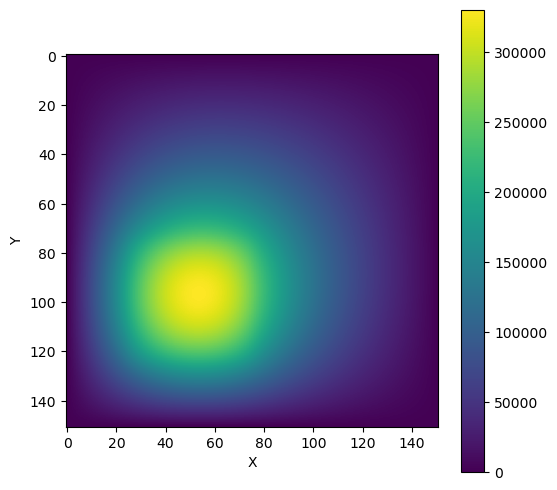

In [89]:
fig = plt.figure(figsize=(6,6))
plt.imshow(ans_r)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()